In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
train.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [11]:
train.groupby(['Sex','Survived']).Survived.count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [12]:
train.groupby(["Pclass"]).Survived.count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [ ]:
train.Embarked.isnull().sum()

2

In [ ]:
train.Embarked.fillna("S",inplace=True)
train.Embarked.isnull().sum()

0

In [ ]:
print("Oldest Age:",train.Age.max(),"Years")
print("Youngest Age:",train.Age.min(),"Years")
print("Average Age:",train.Age.mean(),"Years")

Oldest Age: 80.0 Years
Youngest Age: 0.42 Years
Average Age: 29.69911764705882 Years


In [ ]:
train.Age.isnull().any().sum()

1

In [ ]:
train['Salutations']=0
for i in train:
#lets extract the Salutations for strings which lie between A-Z or a-z and followed by a .(dot).
    train['Salutations']=train.Name.str.extract('([A-Za-z]+)\.')

In [ ]:
pd.crosstab(train.Salutations,train.Sex).T

Salutations,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train['Salutations'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(train.Salutations,train.Sex).T

Salutations,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [ ]:
train.groupby('Salutations')['Age'].mean() 

Salutations
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
train.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band
211,212,1,2,"Cameron, Miss. Clear Annie",female,35.0,0,0,F.C.C. 13528,21.0000,NaN,S,2
287,288,0,3,"Naidenoff, Mr. Penko",male,22.0,0,0,349206,7.8958,NaN,S,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
70,71,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,C.A. 33111,10.5000,NaN,S,1
780,781,1,3,"Ayoub, Miss. Banoura",female,13.0,0,0,2687,7.2292,NaN,C,0


In [ ]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,346
0,277
2,188
3,69
4,11


In [ ]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [ ]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_Range
852,853,0,3,"Boulos, Miss. Nourelain",female,9.0,1,1,2678,15.2458,NaN,C,0,"(14.454, 31.0]"
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0,"(31.0, 512.329]"
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C,0,"(31.0, 512.329]"
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S,2,"(14.454, 31.0]"
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C,1,"(-0.001, 7.91]"


In [ ]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_Range,Salutations
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.90,NaN,S,0,"(31.0, 512.329]",Master
699,700,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,42.0,0,0,348121,7.65,F G63,S,2,"(-0.001, 7.91]",Mr
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.50,C82,C,1,"(31.0, 512.329]",Mr
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.50,NaN,S,2,"(7.91, 14.454]",Mrs
214,215,0,3,"Kiernan, Mr. Philip",male,NaN,1,0,367229,7.75,NaN,Q,0,"(-0.001, 7.91]",Mr


In [ ]:
train['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')

,Age_band
1,346
0,277
2,188
3,69
4,11


In [ ]:
train['Fare_Range']=pd.qcut(train['Fare'],4)
train.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


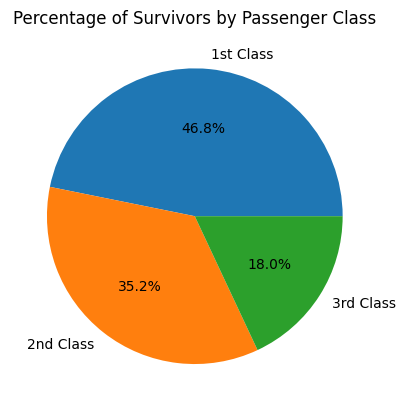

In [14]:
# Pie chart for percentage of survivors by 'Pclass'
survivors_by_pclass = train.groupby(['Pclass']).Survived.mean()
labels = ['1st Class', '2nd Class', '3rd Class']
plt.pie(survivors_by_pclass, labels=labels, autopct='%1.1f%%')
plt.title('Percentage of Survivors by Passenger Class')
plt.show()

In [ ]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_band,Fare_Range,Salutations
87,88,0,3,"Slocovski, Mr. Selman Francis",male,NaN,0,0,SOTON/OQ 392086,8.050,NaN,S,0,"(7.91, 14.454]",Mr
729,730,0,3,"Ilmakangas, Miss. Pieta Sofia",female,25.0,1,0,STON/O2. 3101271,7.925,NaN,S,1,"(7.91, 14.454]",Miss
487,488,0,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.700,B37,C,3,"(14.454, 31.0]",Mr
166,167,1,1,"Chibnall, Mrs. (Edith Martha Bowerman)",female,NaN,0,1,113505,55.000,E33,S,0,"(31.0, 512.329]",Mrs
659,660,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.275,D48,C,3,"(31.0, 512.329]",Mr


In [ ]:
train["Sex"]=train["Sex"].astype(str)
train["Embarked"]=train["Embarked"].astype(str)
train["Salutations"]=train["Salutations"].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    object  
 12  Age_band     891 non-null    int64   
 13  Fare_Range   891 non-null    category
 14  Salutations  891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 98.7+ KB


In [ ]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Salutations'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

In [ ]:
train["Sex"]=train["Sex"].astype(int)
train["Embarked"]=train["Embarked"].astype(int)
train["Salutations"]=train["Salutations"].astype(int)

In [ ]:
train.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Salutations
0,0,3,0,1,0,0,1,0
1,1,1,1,1,0,1,2,1
2,1,3,1,0,0,0,1,2
3,1,1,1,1,0,0,2,1
4,0,3,0,0,0,0,2,0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # for KNN 
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [ ]:
CopyOfTrainDataSet = train.copy() # Working on cpoy of data set and keeping original data set as safe
CopyOfTrainDataSet.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Salutations
0,0,3,0,1,0,0,1,0
1,1,1,1,1,0,1,2,1
2,1,3,1,0,0,0,1,2
3,1,1,1,1,0,0,2,1
4,0,3,0,0,0,0,2,0


In [ ]:
X = CopyOfTrainDataSet.drop(["Survived"],axis=1)
Y = CopyOfTrainDataSet["Survived"]

In [ ]:
X.head()

,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Salutations
0,3,0,1,0,0,1,0
1,1,1,1,0,1,2,1
2,3,1,0,0,0,1,2
3,1,1,1,0,0,2,1
4,3,0,0,0,0,2,0


In [ ]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state = 0,test_size = 0.3)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 7), (268, 7), (623,), (268,))

In [ ]:
NaiveBais = GaussianNB()
NaiveBais.fit(X_train,y_train)
NaiveBais_Predict = NaiveBais.predict(X_test)
print('The accuracy of the Naive Bais Model is',metrics.accuracy_score(NaiveBais_Predict,y_test))

The accuracy of the Naive Bais Model is 0.7947761194029851


In [ ]:
for n in range(1,20,2):
    
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train,y_train)
    Knn_Predict = knn.predict(X_test)
    print('The accuracy of the KNN Model is',n,metrics.accuracy_score(Knn_Predict,y_test))

The accuracy of the KNN Model is 1 0.8059701492537313
The accuracy of the KNN Model is 3 0.8022388059701493
The accuracy of the KNN Model is 5 0.8134328358208955
The accuracy of the KNN Model is 7 0.8097014925373134
The accuracy of the KNN Model is 9 0.8097014925373134
The accuracy of the KNN Model is 11 0.8022388059701493
The accuracy of the KNN Model is 13 0.8022388059701493
The accuracy of the KNN Model is 15 0.8022388059701493
The accuracy of the KNN Model is 17 0.8022388059701493
The accuracy of the KNN Model is 19 0.8022388059701493


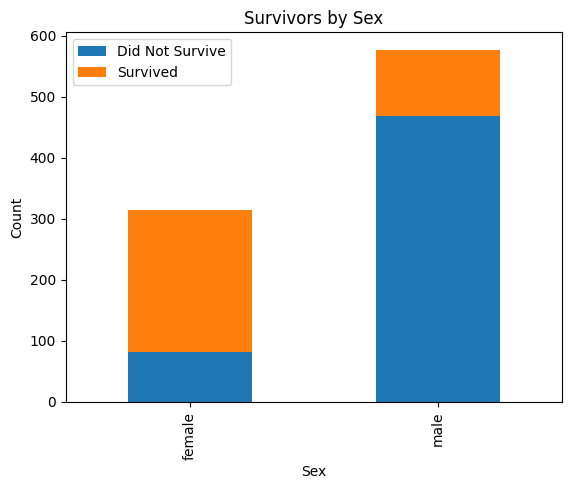

In [13]:
# Bar graph for count of survivors by 'Sex'
sex_survived = train.groupby(['Sex', 'Survived']).size().unstack()
sex_survived.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Survivors by Sex')
plt.legend(['Did Not Survive', 'Survived'])
plt.show()